## AIM:
The goal of the experiment is that.from the data set collected on the trafic of vehicles, preprocess the data and predict on the information given which type of transport is used.  
The attributes of The dataset are following:
1. Age
2. Gender
3. Employed
4. Graduate
5. Work Exp.
6. Salary
7. Distance
8. Licence
9. Transport

#### Importing the libraries:

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [64]:
#Reading Dataset 
df=pd.read_csv(r"C:\Users\super\Software\Mega\Academics\5th sem labs\DS Lab\Datasets\transport.csv") 
df 

,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,28,Male,No,0.0,4,14.3,3.2,0,Public Transport
1,23,Female,Yes,0.0,4,8.3,3.3,0,Public Transport
2,29,Male,Yes,0.0,7,13.4,4.1,0,Public Transport
3,28,Female,Yes,1.0,5,13.4,4.5,0,Public Transport
4,27,Male,Yes,0.0,4,13.4,4.6,0,Public Transport
...,...,...,...,...,...,...,...,...,...
439,40,Male,Yes,0.0,20,57.0,21.4,1,Private Transport
440,38,Male,Yes,0.0,19,44.0,21.5,1,Private Transport
441,37,Male,Yes,0.0,19,45.0,21.5,1,Private Transport
442,37,Male,No,0.0,19,47.0,22.8,1,Private Transport


In [65]:
df.describe()

,Age,Graduate,Work Exp,Salary,Distance,Licence
count,444.000000,443.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.252822,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.435121,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,24.000000,57.000000,23.400000,1.000000


#### Handling null values:

In [66]:
df.isnull().sum()

Age          0
Gender       0
Employed     0
Graduate     1
Work Exp     0
Salary       0
Distance     0
Licence      0
Transport    0
dtype: int64

In [67]:
df.dropna(axis=0, inplace=True)

In [68]:
df.reset_index(drop=True, inplace=True)

In [69]:
df.Transport.unique()

array(['Public Transport', 'Other', 'Private Transport'], dtype=object)

#### Label Encoding:

In [121]:
le = LabelEncoder()

# Select the categorical columns
cat_columns = df.select_dtypes(include=["object"]).columns

# Apply the LabelEncoder to each categorical column
df[cat_columns] = df[cat_columns].apply(lambda col: le.fit_transform(col))

In [83]:
df.head()

,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,0.40,1,0,0.0,0.166667,0.154455,0.000000,0,2
1,0.20,0,1,0.0,0.166667,0.035644,0.004950,0,2
2,0.44,1,1,0.0,0.291667,0.136634,0.044554,0,2
3,0.40,0,1,1.0,0.208333,0.136634,0.064356,0,2
4,0.36,1,1,0.0,0.166667,0.136634,0.069307,0,2


### Correlation Heatmap
*wrt Target Variable

<AxesSubplot:>

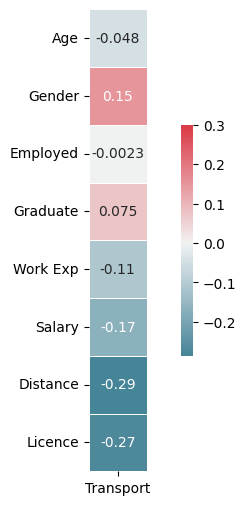

In [72]:
# Select the target variable
target = "Transport"

# Calculate the correlations with the target variable
corr = df.corr()[target]

# Drop the target variable itself
corr = corr.drop(target)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.to_frame(), cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


> `Employment` has very low correlation to the transport mode

#### So, dropping the 'Employed' column:

In [75]:
df.drop('Employed', axis=1)

,Age,Gender,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,0.40,1,0.0,0.166667,0.154455,0.000000,0,2
1,0.20,0,0.0,0.166667,0.035644,0.004950,0,2
2,0.44,1,0.0,0.291667,0.136634,0.044554,0,2
3,0.40,0,1.0,0.208333,0.136634,0.064356,0,2
4,0.36,1,0.0,0.166667,0.136634,0.069307,0,2
...,...,...,...,...,...,...,...,...
438,0.88,1,0.0,0.833333,1.000000,0.900990,1,1
439,0.80,1,0.0,0.791667,0.742574,0.905941,1,1
440,0.76,1,0.0,0.791667,0.762376,0.905941,1,1
441,0.76,1,0.0,0.791667,0.801980,0.970297,1,1


### Splitting and Scaling the Dataset:

In [76]:
df.head()

,Age,Gender,Employed,Graduate,Work Exp,Salary,Distance,Licence,Transport
0,0.40,1,0,0.0,0.166667,0.154455,0.000000,0,2
1,0.20,0,1,0.0,0.166667,0.035644,0.004950,0,2
2,0.44,1,1,0.0,0.291667,0.136634,0.044554,0,2
3,0.40,0,1,1.0,0.208333,0.136634,0.064356,0,2
4,0.36,1,1,0.0,0.166667,0.136634,0.069307,0,2


### Model Building:
Model used: `Random Forest Classifier`

#### Scaling the values:

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['Age', 'Work Exp', 'Salary', 'Distance']
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])

#### Separating target variable:

In [88]:
x = df.drop('Transport', axis=1)
y = df['Transport']

#### Splitting the dataset into training and testing:

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2) 
# x_train = scaler.fit_transform(x_train) 
# x_test = scaler.fit_transform(x_test) 

In [90]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = clf.predict(x_test)

In [82]:
accuracy = clf.score(x_test, y_test)
accuracy

0.7894736842105263

#### Confusion Matrix:

In [93]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [94]:
conf_matrix

array([[ 7,  0, 10],
       [ 0,  8,  5],
       [ 7,  1, 51]], dtype=int64)

C:\Users\super\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


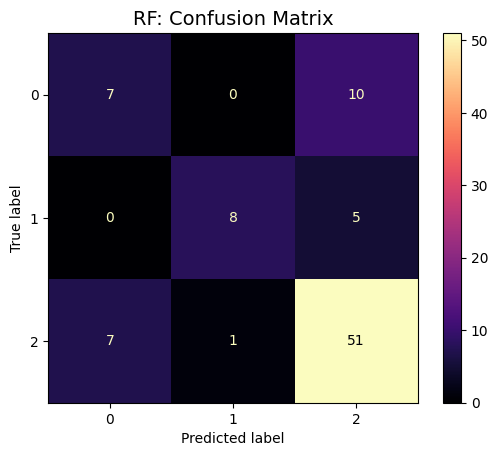

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test,cmap='magma')
plt.title('RF: Confusion Matrix', fontsize=14)
plt.show()

#### Classification Report:

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.89      0.62      0.73        13
           2       0.77      0.86      0.82        59

    accuracy                           0.74        89
   macro avg       0.72      0.63      0.66        89
weighted avg       0.74      0.74      0.73        89



### Conclusion:
Desired task has been performed with approx. `80%` accuracy